# This notebook's function is to read in the data from the out_.xlsx files (which should all be in a consistent format) and generate an excel file from the data.

In [1]:
# import modules
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in all of the out_.xlsx files, they can be read from column M of Vehicle_fleet_data 

In [2]:
# read in data, set the header to be the desired column titles
df = pd.read_excel('vehicle_fleet_stock.xlsx', sheet_name= 'data', index_col=[0],)
df.index.name = 'id'
df # view the data frame

,accessed,date_of_measurement,footnote,geo,model_year,motor_energy,notebook,process,source,unit,value,vehicle_class,vehicle_segment,year_of_first_registraion,year_of_measurement
id,,,,,,,,,,,,,,,
5000000010,2020-07-06,NaN,NaN,40,all,all,005_s_EU_1996_2018_cl(pc)_wt_eurostat.ipynb,r,EUROSTAT,nr,829000.0,EUM1,b100,NaN,2006
5000000011,2020-07-06,NaN,NaN,40,all,all,005_s_EU_1996_2018_cl(pc)_wt_eurostat.ipynb,r,EUROSTAT,nr,772000.0,EUM1,b100,NaN,2007
5000000012,2020-07-06,NaN,NaN,40,all,all,005_s_EU_1996_2018_cl(pc)_wt_eurostat.ipynb,r,EUROSTAT,nr,728000.0,EUM1,b100,NaN,2008
5000000013,2020-07-06,NaN,NaN,40,all,all,005_s_EU_1996_2018_cl(pc)_wt_eurostat.ipynb,r,EUROSTAT,nr,688000.0,EUM1,b100,NaN,2009
5000000014,2020-07-06,NaN,NaN,40,all,all,005_s_EU_1996_2018_cl(pc)_wt_eurostat.ipynb,r,EUROSTAT,nr,657000.0,EUM1,b100,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000000139,2020-06-30,NaN,NaN,356,all,all,006_s_IN_2001_2016_cl_inmorth.ipynb,r,MOSPI,nr,159490578.0,all,all,NaN,2012
6000000140,2020-06-30,NaN,NaN,356,all,all,006_s_IN_2001_2016_cl_inmorth.ipynb,r,MOSPI,nr,182445229.0,all,all,NaN,2013
6000000141,2020-06-30,NaN,NaN,356,all,all,006_s_IN_2001_2016_cl_inmorth.ipynb,r,MOSPI,nr,190703971.0,all,all,NaN,2014


In [3]:
# this should have the same result
# df = pd.read_pickle('stock_df.pickle')

In [4]:
# this step should be uneccessary
df.drop_duplicates(inplace=True)

## now I'd like to make a new dataframe focusing on just passenger cars as defined by my own definition 'p_c' in vehicle_fleet_dictionary.xlsx



In [5]:
# copy the dataframe to make a new object named p_c
df_p_or_c = df.copy()

In [6]:
# read in the dictiory file
dictxls = pd.ExcelFile('vehicle_fleet_dictionary.xlsx')
# assemble p_c dictionary lists
class_dict_df = pd.read_excel(dictxls, sheet_name= 'class', index_col= 0)
pass_or_com = class_dict_df['p_c'].to_list()
class_code = class_dict_df['class_code'].to_list()
class_dict_df

,class_code,p_c
id,,
1,EUM1,p
2,EUM2,c
3,EUM3,c
4,EUN1,c
5,EUN2,c
6,EUN3,c
7,EUL,m
8,OIPC,p
9,OICV,c


In [7]:
# replace the vehicle class codes with p_c codes
df_p_or_c['vehicle_class'].replace(to_replace=class_code, value=pass_or_com, inplace=True)

In [8]:
# make a datafram of just the passenger cars (according to *somewhat* arbitrary mapping)
p_df = df_p_or_c[(df_p_or_c.vehicle_class=='p')]
p_df

,accessed,date_of_measurement,footnote,geo,model_year,motor_energy,notebook,process,source,unit,value,vehicle_class,vehicle_segment,year_of_first_registraion,year_of_measurement
id,,,,,,,,,,,,,,,
5000000010,2020-07-06,NaN,NaN,40,all,all,005_s_EU_1996_2018_cl(pc)_wt_eurostat.ipynb,r,EUROSTAT,nr,829000.0,p,b100,NaN,2006
5000000011,2020-07-06,NaN,NaN,40,all,all,005_s_EU_1996_2018_cl(pc)_wt_eurostat.ipynb,r,EUROSTAT,nr,772000.0,p,b100,NaN,2007
5000000012,2020-07-06,NaN,NaN,40,all,all,005_s_EU_1996_2018_cl(pc)_wt_eurostat.ipynb,r,EUROSTAT,nr,728000.0,p,b100,NaN,2008
5000000013,2020-07-06,NaN,NaN,40,all,all,005_s_EU_1996_2018_cl(pc)_wt_eurostat.ipynb,r,EUROSTAT,nr,688000.0,p,b100,NaN,2009
5000000014,2020-07-06,NaN,NaN,40,all,all,005_s_EU_1996_2018_cl(pc)_wt_eurostat.ipynb,r,EUROSTAT,nr,657000.0,p,b100,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000000107,2020-06-30,NaN,NaN,356,all,all,006_s_IN_2001_2016_cl_inmorth.ipynb,r,MOSPI,nr,1987098.0,p,all,NaN,2012
6000000108,2020-06-30,NaN,NaN,356,all,all,006_s_IN_2001_2016_cl_inmorth.ipynb,r,MOSPI,nr,2132893.0,p,all,NaN,2013
6000000109,2020-06-30,NaN,NaN,356,all,all,006_s_IN_2001_2016_cl_inmorth.ipynb,r,MOSPI,nr,2216888.0,p,all,NaN,2014


### Compare the passenger car data from Eurostat and OICA

In [9]:
# get passenger cars for norway where all attributes are all and source is eurostat
p_no_euro= p_df[(p_df.geo==578) & (p_df.source=='EUROSTAT') & (p_df.motor_energy=='all') & (p_df.vehicle_segment=='all')]
p_no_euro

,accessed,date_of_measurement,footnote,geo,model_year,motor_energy,notebook,process,source,unit,value,vehicle_class,vehicle_segment,year_of_first_registraion,year_of_measurement
id,,,,,,,,,,,,,,,
4000000029,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2443000.0,p,all,NaN,2012
4000000573,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2500265.0,p,all,NaN,2013
4000001117,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2555443.0,p,all,NaN,2014
4000001661,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2610000.0,p,all,NaN,2015
4000002205,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2662910.0,p,all,NaN,2016
4000002749,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2719396.0,p,all,NaN,2017
4000003293,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2751949.0,p,all,NaN,2018


In [10]:
# get passenger cars for norway where all attributes are all and source is oica
p_no_oica=  p_df[(p_df.geo==578) & (p_df.source=='EUROSTAT') & (p_df.motor_energy=='all') & (p_df.vehicle_segment=='all')]
p_no_oica

,accessed,date_of_measurement,footnote,geo,model_year,motor_energy,notebook,process,source,unit,value,vehicle_class,vehicle_segment,year_of_first_registraion,year_of_measurement
id,,,,,,,,,,,,,,,
4000000029,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2443000.0,p,all,NaN,2012
4000000573,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2500265.0,p,all,NaN,2013
4000001117,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2555443.0,p,all,NaN,2014
4000001661,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2610000.0,p,all,NaN,2015
4000002205,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2662910.0,p,all,NaN,2016
4000002749,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2719396.0,p,all,NaN,2017
4000003293,2020-07-03,NaN,NaN,578,all,all,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2751949.0,p,all,NaN,2018


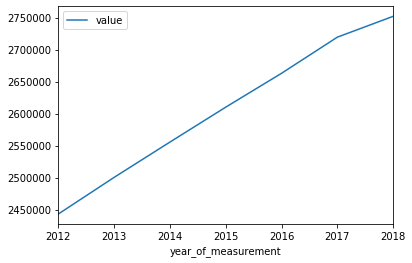

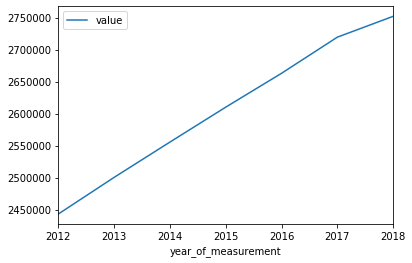

In [11]:
# plot on separate plots with pandas built in plot function
p_no_euro.plot(x='year_of_measurement', y = 'value')
p_no_oica.plot(x='year_of_measurement', y = 'value')

Well, this is a fairly uninformative plot. though it shows us that the Eurostat data and the OICA data match. I guess the useability of the data will increase once we get more data in it.

### Lets try to compare BEV's in Norway and in Sweden

In [12]:
p_no_BEV= p_df[(p_df.geo==578) & (p_df.motor_energy=='BEV') & (p_df.vehicle_segment=='all')]
p_no_BEV

,accessed,date_of_measurement,footnote,geo,model_year,motor_energy,notebook,process,source,unit,value,vehicle_class,vehicle_segment,year_of_first_registraion,year_of_measurement
id,,,,,,,,,,,,,,,
4000000131,2020-07-03,NaN,NaN,578,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,8000.0,p,all,NaN,2012
4000000675,2020-07-03,NaN,NaN,578,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,18000.0,p,all,NaN,2013
4000001219,2020-07-03,NaN,NaN,578,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,39000.0,p,all,NaN,2014
4000001763,2020-07-03,NaN,NaN,578,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,69000.0,p,all,NaN,2015
4000002307,2020-07-03,NaN,NaN,578,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,97532.0,p,all,NaN,2016
4000002851,2020-07-03,NaN,NaN,578,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,138983.0,p,all,NaN,2017
4000003395,2020-07-03,NaN,NaN,578,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,195348.0,p,all,NaN,2018


In [13]:
p_se_BEV= p_df[(p_df.geo==752) & (p_df.motor_energy=='BEV') & (p_df.vehicle_segment=='all')]
p_se_BEV

,accessed,date_of_measurement,footnote,geo,model_year,motor_energy,notebook,process,source,unit,value,vehicle_class,vehicle_segment,year_of_first_registraion,year_of_measurement
id,,,,,,,,,,,,,,,
4000000128,2020-07-03,NaN,NaN,752,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,603.0,p,all,NaN,2012
4000000672,2020-07-03,NaN,NaN,752,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,1010.0,p,all,NaN,2013
4000001216,2020-07-03,NaN,NaN,752,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,2172.0,p,all,NaN,2014
4000001760,2020-07-03,NaN,NaN,752,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,4765.0,p,all,NaN,2015
4000002304,2020-07-03,NaN,NaN,752,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,7532.0,p,all,NaN,2016
4000002848,2020-07-03,NaN,NaN,752,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,11034.0,p,all,NaN,2017
4000003392,2020-07-03,NaN,NaN,752,all,BEV,004_s_EU_2012_2018_cl(pc)_me_eurostat.ipynb,r,EUROSTAT,nr,16664.0,p,all,NaN,2018


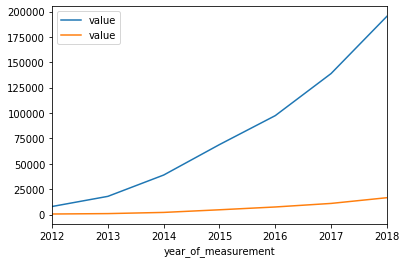

In [14]:
# gca stands for 'get current axis'
ax = plt.gca()

p_no_BEV.plot(kind='line',x='year_of_measurement',y='value',ax=ax)
p_se_BEV.plot(kind='line',x='year_of_measurement',y='value',ax=ax)

plt.show()


This is a bit more useful. I don't want to spend too much time on this as I'm not up on plotting in pandas. But the concept is there at least